In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/LENOVO/Desktop/Clases/Minería de datos/Github/ProyectoDataMining/defunciones/Defunciones.csv", header = "infer", delimiter = ",", encoding = "latin-1")

C:\Users\LENOVO\anaconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (17,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,depreg,mupreg,mesreg,añoreg,depocu,mupocu,areag,sexo,diaocu,mesocu,...,dredif,mredif,caudef,asist,ocur,cerdef,escodif,pnadif,predif,ciuodif
0,5,505,1,9,5,505,9.0,1,2,1,...,1,101,Y214,1,3,1,NaN,NaN,NaN,NaN
1,1,101,9,9,1,101,9.0,1,27,9,...,1,101,X919,4,3,1,NaN,NaN,NaN,NaN
2,22,2206,9,9,22,2206,9.0,2,23,8,...,1,101,X959,4,3,2,NaN,NaN,NaN,NaN
3,2,201,12,9,2,201,9.0,1,5,12,...,1,101,V899,4,3,1,NaN,NaN,NaN,NaN
4,1,101,5,9,1,101,9.0,2,7,5,...,1,101,X709,4,3,1,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

depreg          0
mupreg          0
mesreg          0
añoreg          0
depocu          0
mupocu          0
areag      168671
sexo            0
diaocu          0
mesocu          0
añoocu          0
edadif          0
perdif          0
puedif          0
ecidif          0
ocudif     565215
dnadif          0
mnadif          0
nacdif          0
dredif          0
mredif          0
caudef          0
asist           0
ocur            0
cerdef          0
escodif     71707
pnadif     216809
predif     216809
ciuodif    289466
dtype: int64

In [5]:
len(df)

854681

In [6]:
o=df.isnull()

mask=o.any(axis = 1)

In [7]:
muchos_nas = ["escodif","ciuodif","pnadif","predif","ocudif"]

In [8]:
columnas = df.columns
columnas

Index(['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag',
       'sexo', 'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'puedif',
       'ecidif', 'ocudif', 'dnadif', 'mnadif', 'nacdif', 'dredif', 'mredif',
       'caudef', 'asist', 'ocur', 'cerdef', 'escodif', 'pnadif', 'predif',
       'ciuodif'],
      dtype='object')

In [9]:
df["añoreg"].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int64)

In [10]:
df["añoocu"].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int64)

In [11]:
corr=df.corr(method = 'spearman')

In [12]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,depreg,mupreg,mesreg,añoreg,depocu,mupocu,areag,sexo,diaocu,mesocu,añoocu,edadif,perdif,puedif,ecidif,ocudif,dnadif,nacdif,dredif,mredif,asist,ocur,cerdef,escodif,pnadif,predif
depreg,1.00,0.99,-0.01,0.00,0.99,0.98,0.43,0.01,0.00,-0.00,0.00,-0.01,-0.01,-0.18,-0.05,-0.03,0.67,-0.01,0.76,0.76,0.40,0.23,0.27,-0.21,-0.03,-0.02
mupreg,0.99,1.00,-0.01,-0.00,0.98,0.98,0.45,0.01,0.00,-0.00,-0.00,-0.01,-0.00,-0.19,-0.05,-0.03,0.66,-0.01,0.75,0.75,0.42,0.26,0.29,-0.22,-0.03,-0.02
mesreg,-0.01,-0.01,1.00,-0.01,-0.01,-0.01,-0.01,0.00,-0.00,0.88,-0.01,0.00,0.00,-0.00,0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,0.01,0.01,-0.00,0.01
añoreg,0.00,-0.00,-0.01,1.00,0.00,0.01,-0.02,0.02,0.00,-0.00,1.00,0.05,0.01,0.03,-0.02,-0.05,-0.00,0.44,0.04,0.05,0.04,0.14,0.17,-0.03,-0.01,0.06
depocu,0.99,0.98,-0.01,0.00,1.00,0.99,0.43,0.01,0.00,-0.00,0.00,-0.01,-0.01,-0.18,-0.05,-0.03,0.67,-0.01,0.76,0.75,0.41,0.24,0.28,-0.21,-0.02,-0.02
mupocu,0.98,0.98,-0.01,0.01,0.99,1.00,0.45,0.01,0.00,0.00,0.01,-0.00,0.00,-0.19,-0.04,-0.03,0.65,-0.01,0.74,0.74,0.43,0.28,0.29,-0.21,-0.02,-0.02
areag,0.43,0.45,-0.01,-0.02,0.43,0.45,1.00,0.00,0.00,-0.00,-0.02,0.03,0.06,-0.22,-0.02,-0.02,0.22,-0.01,0.29,0.30,0.62,0.51,0.40,-0.19,-0.02,-0.02
sexo,0.01,0.01,0.00,0.02,0.01,0.01,0.00,1.00,0.00,0.00,0.02,0.11,-0.00,-0.02,-0.03,0.33,0.02,-0.00,-0.01,-0.01,-0.03,0.01,0.01,-0.13,-0.03,-0.02
diaocu,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
mesocu,-0.00,-0.00,0.88,-0.00,-0.00,0.00,-0.00,0.00,0.02,1.00,-0.00,0.01,0.01,-0.01,0.00,-0.01,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.02,0.01,-0.00,0.00


In [13]:
x=np.array([[0],[1],[2],[3],[4]]*6).reshape(30)
y =np.array([[0],[1],[2],[3],[4],[5]]*5).reshape(30)
            


In [45]:
df2 =  df.sample(n = 300000, random_state = 666)
df2 = df.infer_objects()
df2.dtypes

depreg       int64
mupreg       int64
mesreg       int64
añoreg       int64
depocu       int64
mupocu       int64
areag      float64
sexo         int64
diaocu       int64
mesocu       int64
añoocu       int64
edadif       int64
perdif       int64
puedif       int64
ecidif       int64
ocudif     float64
dnadif       int64
mnadif      object
nacdif       int64
dredif       int64
mredif       int64
caudef      object
asist        int64
ocur         int64
cerdef       int64
escodif    float64
pnadif     float64
predif     float64
ciuodif     object
dtype: object

In [46]:
df2_numeric = df2.select_dtypes(include = np.number)

In [47]:
columnas_numericas  = df2_numeric.columns

In [49]:
#contador = 0
#fig, axs = plt.subplots(5,6, figsize=(30,30))
#for i in range(0,len(columnas)):
    #sns.barplot(ax = axs[x[i],y[i]],data =df2_numeric, x = columnas_numericas[i], hue =  "añoreg")
    #axs[x[i],y[i]].set_title(columnas[i], fontsize = "xx-large")



In [73]:
o = pd.DataFrame()


In [42]:

plt.ioff()
for i in range(0,len(columnas)):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data =df2, x = columnas[i])
    plt.tight_layout()
    plt.title(columnas[i], fontsize = "xx-large")
    fig.savefig("C:/Users/LENOVO/Desktop\Clases/Minería de datos/Github/ProyectoDataMining/Imagenes/"+columnas[i]+".jpg", bbox_inches ='tight')
    plt.close(fig)

In [101]:
for i in range(0,len(columnas)):
    fig,ax1 = plt.subplots(figsize=(10,10))
    o = pd.DataFrame()
    o["porcentaje"]=df2[columnas[i]].value_counts( sort = True,normalize = True)
    o["cumsum"] = o["porcentaje"].cumsum()
    sns.countplot(ax = ax1,data =df2, x = columnas[i])
    fig.tight_layout()
    fig.suptitle(columnas[i], fontsize = "xx-large")
    ax2 = ax1.twinx()
    
    sns.pointplot(ax = ax2,data =o, x = o.index, y = o["porcentaje"], color = "yellow")
    sns.pointplot(ax = ax2,data =o, x = o.index, y = o["cumsum"] , color = "blue")
    ax2.set_ylabel('%')
    ax2.tick_params(axis='y')
    fig.savefig("C:/Users/LENOVO/Desktop\Clases/Minería de datos/Github/ProyectoDataMining/Imagenes/"+columnas[i]+".jpg", bbox_inches ='tight')
    plt.close(fig)
    del o 

In [51]:
for i in columnas:
    print("Columna: "+ i)
    print(df2[i].value_counts(sort = True))
    print("")
    print("Valores normalizados")
    print(df2[i].value_counts(sort = True, normalize = True))
    print("")
    print("**************")
    print("")

Columna: depreg
1     252048
16     52900
9      51937
12     50795
13     48117
5      47764
14     42914
10     31897
4      30030
22     25956
8      24774
6      23335
20     22151
17     21114
18     20188
7      19051
3      17860
11     17694
21     17163
19     15218
15     12808
2       8967
Name: depreg, dtype: int64

Valores normalizados
1     0.294903
16    0.061894
9     0.060768
12    0.059432
13    0.056298
5     0.055885
14    0.050211
10    0.037320
4     0.035136
22    0.030369
8     0.028986
6     0.027303
20    0.025917
17    0.024704
18    0.023621
7     0.022290
3     0.020897
11    0.020702
21    0.020081
19    0.017805
15    0.014986
2     0.010492
Name: depreg, dtype: float64

**************

Columna: mupreg
101     205984
901      19015
501      13868
1601     13790
1001      9512
         ...  
711        171
716        143
702        127
703        111
1333        38
Name: mupreg, Length: 340, dtype: int64

Valores normalizados
101     0.241007
901     0.022

In [91]:
del o 

In [92]:
o["porcentaje"]=df2["añoocu"].value_counts(sort = True, normalize = True)
o["cumsum"] = o.cumsum()

NameError: name 'o' is not defined

<AxesSubplot:>

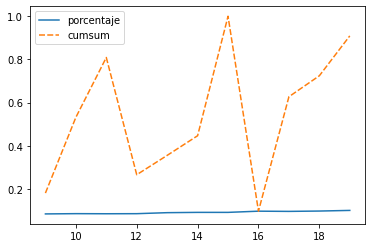

In [89]:
sns.lineplot(data =o)

In [90]:
o

,porcentaje,cumsum
1,NaN,NaN
16,0.096603,0.096603
9,0.083899,0.180502
12,0.085011,0.265513
13,0.089670,0.355183
5,NaN,NaN
14,0.091036,0.446219
10,0.085117,0.531336
4,NaN,NaN
22,NaN,NaN
